참고 사이트
https://github.com/AlpacaDB/selectivesearch

## Selective Search

In [1]:
!pip install selectivesearch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for selectivesearch: filename=selectivesearch-0.4-py3-none-any.whl size=4350 sha256=a008d941ee310661eec67d1e071e753d0a2b726d7be44a3653c05a69edb12fa4
  Stored in directory: /root/.cache/pip/wheels/66/4e/88/6de23ce74be839a953498c4ebdfa809ad7da9422ac89ae856c
Successfully built selectivesearch


In [2]:
import skimage.data
import selectivesearch
import matplotlib.pyplot as plt
import cv2

In [3]:
img = skimage.data.astronaut()

In [4]:
img.shape

(512, 512, 3)

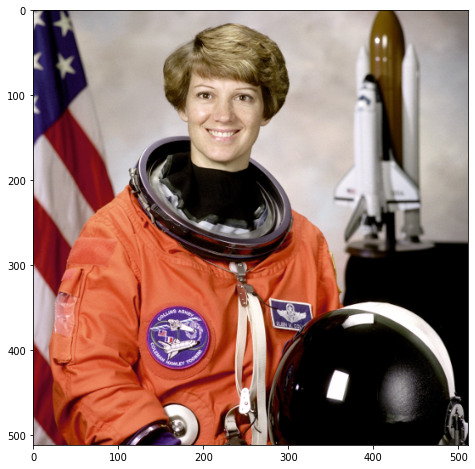

In [5]:
plt.figure(figsize=(8,8))
plt.imshow(img)

In [6]:
img_lbl, regions = selectivesearch.selective_search(img, scale=500, sigma=0.9, min_size=1000)

In [7]:
print(type(img_lbl))
print(img.shape)
print(type(regions))
print(len(regions))

<class 'numpy.ndarray'>
(512, 512, 3)
<class 'list'>
62


In [8]:
regions[:5]

[{'rect': (0, 0, 61, 155), 'size': 6349, 'labels': [0.0]},
 {'rect': (10, 0, 109, 227), 'size': 2098, 'labels': [1.0]},
 {'rect': (46, 0, 362, 326), 'size': 45561, 'labels': [2.0]},
 {'rect': (393, 0, 42, 187), 'size': 5547, 'labels': [3.0]},
 {'rect': (423, 0, 88, 269), 'size': 15778, 'labels': [4.0]}]

In [9]:
cand_rect = [cand['rect'] for cand in regions]
cand_rect

[(0, 0, 61, 155),
 (10, 0, 109, 227),
 (46, 0, 362, 326),
 (393, 0, 42, 187),
 (423, 0, 88, 269),
 (183, 14, 122, 219),
 (152, 17, 147, 171),
 (411, 38, 43, 172),
 (419, 52, 92, 230),
 (356, 58, 46, 183),
 (401, 109, 50, 139),
 (0, 118, 93, 120),
 (0, 150, 69, 125),
 (111, 150, 194, 198),
 (133, 155, 156, 99),
 (109, 177, 55, 107),
 (23, 210, 216, 228),
 (305, 216, 191, 232),
 (0, 219, 92, 206),
 (368, 223, 143, 281),
 (245, 233, 146, 165),
 (366, 238, 57, 66),
 (32, 300, 57, 70),
 (0, 305, 20, 102),
 (0, 333, 237, 178),
 (148, 333, 126, 178),
 (265, 336, 246, 175),
 (361, 345, 133, 109),
 (134, 348, 75, 75),
 (288, 363, 200, 148),
 (405, 414, 59, 73),
 (103, 479, 77, 32),
 (23, 210, 216, 228),
 (152, 14, 153, 219),
 (109, 14, 196, 270),
 (265, 336, 246, 175),
 (401, 38, 53, 210),
 (148, 233, 243, 278),
 (288, 223, 223, 288),
 (0, 118, 93, 307),
 (0, 333, 237, 178),
 (401, 38, 110, 244),
 (0, 233, 391, 278),
 (109, 14, 196, 334),
 (305, 216, 191, 232),
 (265, 216, 246, 295),
 (401, 0, 

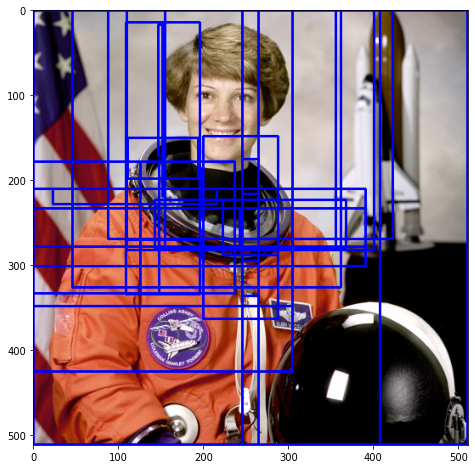

In [10]:
dst = img.copy()

cand_rect = [cand['rect'] for cand in regions if cand['size']>10000]

for rect in cand_rect:
    left = rect[0]
    top = rect[1]
    right = rect[2]
    bottom = rect[3]
    
    cv2.rectangle(dst, (left, top), (right, bottom), color=[0, 0, 255], thickness=2)

plt.figure(figsize=(8, 8))
plt.imshow(dst)

## IOU

In [11]:
import numpy as np

In [12]:
def compute_iou(cand_box, gt_box):
    # Calculate intersection areas
    x1 = np.maximum(cand_box[0], gt_box[0])
    y1 = np.maximum(cand_box[1], gt_box[1])
    x2 = np.minimum(cand_box[2], gt_box[2])
    y2 = np.minimum(cand_box[3], gt_box[3])
    
    intersection = np.maximum(x2 - x1, 0) * np.maximum(y2 - y1, 0)
    cand_box_area = (cand_box[2] - cand_box[0]) * (cand_box[3] - cand_box[1])
    gt_box_area = (gt_box[2] - gt_box[0]) * (gt_box[3] - gt_box[1])
    union = cand_box_area + gt_box_area - intersection
    
    iou = intersection / union
    
    return iou

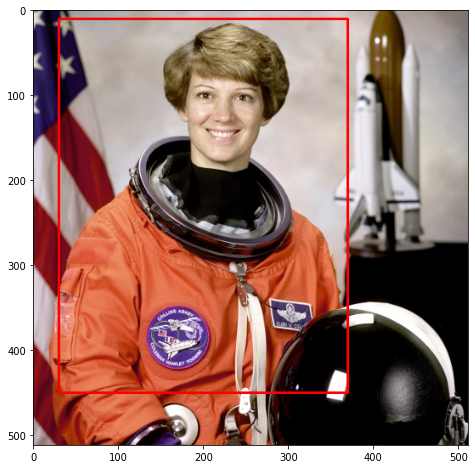

In [13]:
gt_box = [30, 10, 370, 450]
dst = img.copy()

cv2.rectangle(dst, (gt_box[0], gt_box[1]), (gt_box[2], gt_box[3]), color=(255, 0, 0), thickness=2)

plt.figure(figsize=(8, 8))
plt.imshow(dst)

In [14]:
cand_rects = [cand['rect'] for cand in regions if cand['size']>10000]
print(len(cand_rects))

34


In [15]:
cand_rects

[(46, 0, 362, 326),
 (423, 0, 88, 269),
 (152, 17, 147, 171),
 (111, 150, 194, 198),
 (23, 210, 216, 228),
 (368, 223, 143, 281),
 (0, 333, 237, 178),
 (148, 333, 126, 178),
 (288, 363, 200, 148),
 (23, 210, 216, 228),
 (152, 14, 153, 219),
 (109, 14, 196, 270),
 (265, 336, 246, 175),
 (148, 233, 243, 278),
 (288, 223, 223, 288),
 (0, 333, 237, 178),
 (0, 233, 391, 278),
 (109, 14, 196, 334),
 (265, 216, 246, 295),
 (401, 0, 110, 282),
 (0, 210, 391, 301),
 (0, 0, 305, 348),
 (356, 0, 155, 282),
 (356, 0, 155, 282),
 (265, 0, 246, 511),
 (0, 0, 305, 425),
 (0, 210, 391, 301),
 (0, 0, 511, 511),
 (0, 0, 408, 511),
 (288, 223, 223, 288),
 (0, 0, 511, 511),
 (0, 0, 511, 511),
 (0, 0, 511, 511),
 (0, 0, 511, 511)]

index: 0 iou : 0.6196528433437432
index: 21 iou : 0.5709810184900792
index: 25 iou : 0.6912477286493035
index: 27 iou : 0.572914472600825
index: 28 iou : 0.7175472928897586
index: 30 iou : 0.572914472600825
index: 31 iou : 0.572914472600825
index: 32 iou : 0.572914472600825
index: 33 iou : 0.572914472600825


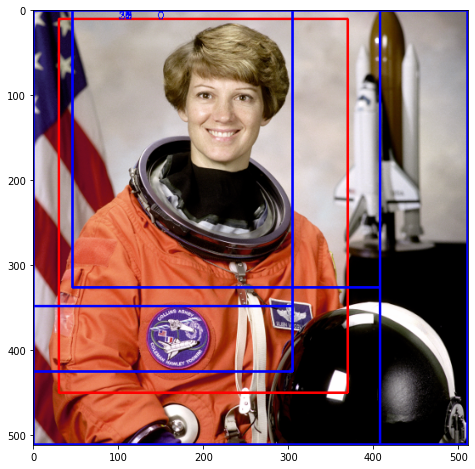

In [16]:
for i, cand_box in enumerate(cand_rects):
    cand_box = list(cand_box)
    cand_box[2] += cand_box[0]
    cand_box[3] += cand_box[1]
    
    iou = compute_iou(cand_box, gt_box)
    
    
    if iou > 0.5:
        print("index:", i, "iou :", iou)
        cv2.rectangle(dst, (cand_box[0], cand_box[1]), (cand_box[2], cand_box[3]), color=(0, 0, 255), thickness=2)
        #text = "{}: {:.2f}".format(i, iou)
        text = "{}".format(i)
        cv2.putText(dst, text, (cand_box[0]+ 100, cand_box[1]+10), cv2.FONT_HERSHEY_SIMPLEX, 0.4, color=(0, 0, 255), thickness=1)        
        
plt.figure(figsize=(8, 8))
plt.imshow(dst)